In [14]:
import pyrothermel
import pandas as pd
import seaborn as sns

## Setup Base Fuel Model and Moisture Scenario

In [15]:
moisture = pyrothermel.MoistureScenario.from_existing(dead_fuel_moisture_class='low',live_fuel_moisture_class='moderate')
fuel = pyrothermel.FuelModel.from_existing(identifier='TL8')
canopy_base_height = 2.5 # default unit is m
canopy_bulk_density = .1 # default unit is kg/m^3

# Print some fuel loading values from fuel model TL8
print([fuel.fuel_load_one_hour, fuel.fuel_load_ten_hour, fuel.fuel_load_hundred_hour])
print(fuel.units.loading_units)


[1.300187341185569, 0.31383832373444764, 0.2465872543627803]
LoadingUnitsEnum.KilogramsPerSquareMeter


## Run Rothermel Models Across Range of Wind Speeds

In [16]:
results_list = []
for wind_speed in range(0,60,2):
    run = pyrothermel.PyrothermelRun(fuel,moisture,wind_speed,wind_input_mode='ten_meter',canopy_base_height=canopy_base_height,canopy_bulk_density=canopy_bulk_density,canopy_cover=.5,canopy_height=20,canopy_ratio=.6)
    results_surface = run.run_surface_fire_in_direction_of_max_spread()
    results_final = run.run_crown_fire_scott_and_reinhardt()
    results_final['wind_speed'] = wind_speed
    results_final['treatment'] = 'untreated'
    results_list.append(results_final)
    
untreated_crowning_index = run.calculate_crowning_index()
untreated_torching_index = run.calculate_torching_index()
    
df = pd.DataFrame(results_list)
df


,spread_rate,flame_length,fireline_intensity,scorch_height,transition_ratio,active_ratio,fire_type,wind_speed,treatment
0,0.035297,0.850504,182.940784,5.005403,0.274758,0.025974,Surface,0,untreated
1,0.036477,0.863471,189.058483,5.150455,0.283946,0.033603,Surface,2,untreated
2,0.038485,0.885015,199.463628,5.391881,0.299574,0.046541,Surface,4,untreated
3,0.040997,0.911142,212.486479,5.685303,0.319133,0.062713,Surface,6,untreated
4,0.043907,0.940336,227.566123,6.013981,0.341781,0.081423,Surface,8,untreated
5,0.047152,0.971693,244.386618,6.367902,0.367044,0.102279,Surface,10,untreated
6,0.050693,1.004603,262.738585,6.740268,0.394606,0.125023,Surface,12,untreated
7,0.054500,1.038631,282.470446,7.126172,0.424242,0.149466,Surface,14,untreated
8,0.058551,1.073456,303.466091,7.521935,0.455775,0.175465,Surface,16,untreated
9,0.062828,1.108839,325.633015,7.924731,0.489067,0.202906,Surface,18,untreated


## Modify Fuel Loading and Recalculate

In [17]:
fuel.fuel_load_one_hour *= .5
fuel.fuel_load_ten_hour *= .5
fuel.fuel_load_hundred_hour *= .75
fuel.fuel_bed_depth *= .5

results_list = []
for wind_speed in range(0,60,2):
    run = pyrothermel.PyrothermelRun(fuel,moisture,wind_speed,wind_input_mode='ten_meter',canopy_base_height=2.5,canopy_bulk_density=.1,canopy_cover=.5,canopy_height=20,canopy_ratio=.6)
    results_surface = run.run_surface_fire_in_direction_of_max_spread()
    results_final = run.run_crown_fire_scott_and_reinhardt()
    results_final['wind_speed'] = wind_speed
    results_final['treatment'] = 'treated'
    results_list.append(results_final)

treated_crowning_index = run.calculate_crowning_index()
treated_torching_index = run.calculate_torching_index()

df_treated = pd.DataFrame(results_list)
df = pd.concat([df,df_treated])

## Display Results

[Text(0.5, 0, 'Wind Speed (km/hr)'), Text(0, 0.5, 'Flame Length (m)')]

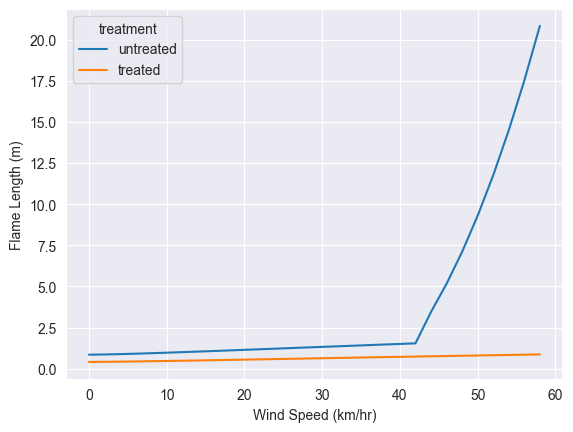

In [18]:
sns.lineplot(df,x='wind_speed',y='flame_length',hue='treatment').set(xlabel='Wind Speed (km/hr)',ylabel='Flame Length (m)')

In [19]:
print('Wind Speed to initiate crown fire in untreated stand: ', untreated_torching_index, ' km/hr')
print('Wind Speed to initiate crown fire in treated stand: ', treated_torching_index, ' km/hr')
print('Wind Speed to propagate crown fire in untreated stand: ', untreated_crowning_index, ' km/hr')
print('Wind Speed to propagate crown fire in treated stand: ', treated_crowning_index, ' km/hr')

Wind Speed to initiate crown fire in untreated stand:  43  km/hr
Wind Speed to initiate crown fire in treated stand:  98  km/hr
Wind Speed to propagate crown fire in untreated stand:  60  km/hr
Wind Speed to propagate crown fire in treated stand:  60  km/hr
